# Thermal denaturation fitting solutions
## Do imports

In [1]:
%run -i 'imports.py'

In [2]:
%run -i 'definitions_and_defaults.py'

In [3]:
datadir = basedir+'/thermal_denaturation_data'
os.listdir(datadir)

['PupB NTSD L74A 25 uM 217 nm R.csv',
 'PupB NTSD H72D 25 uM 217nm R.csv',
 'PupB NTSD L74A 25 uM 217 nm F.csv',
 'PupB NTSD Q69K 25 uM 217nm F.csv',
 'PupB NTSD Q69K 25 uM 217nm R.csv',
 'PupB NTSD H72D 25 uM 217nm F.csv',
 'dmm_L74A_F_fit_figure.png',
 'PupB NTSD L74A 25 uM 217 nm F.tsv']

of which I'll fit 'Q69K...F.csv' and 'L74A...R.csv' because a non-intuitive step creeps into processing these renaturation data.
## Read and Scatter Plot:
<i>Always</i> look at your raw data.

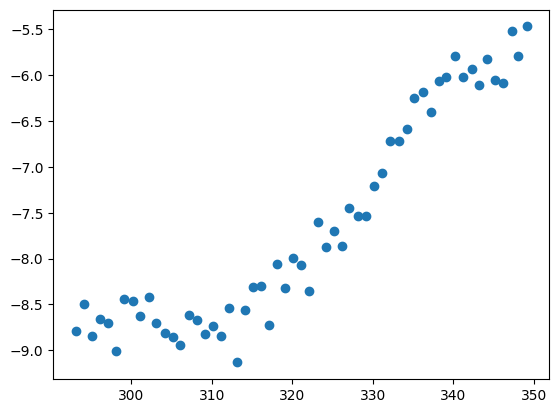

In [4]:
# read
fn = datadir+'/PupB NTSD Q69K 25 uM 217nm F.csv'
x,y = csv2xy(fn)

# scatter plot:
plt.scatter(x,y)
plt.show()

## Get the low- and high-temperature lines:

In [5]:
# get the first 20 points for a low temp line
eks = x[:20]
why = y[:20]

ltlineparam, pcov = curve_fit(sl, eks, why)
m1 = ltlineparam[0]
b1 = ltlineparam[1]

# get the last 15 points for a high temp line
eks = x[-15:]
why = y[-15:]

htlineparam, pcov = curve_fit(sl, eks, why)
m2 = htlineparam[0]
b2 = htlineparam[1]


## Estimates for $\Delta H$ and $T_M$:

In [6]:
deltaH = 250000
TM = 330
print('initial guesses for fitting:')
print('m1: %0.3f, b1: %0.3f, m2: %0.3f, b2: %0.3f, deltaH: %0.0f, TM: %0.0f' % (m1, b1, m2, b2, deltaH, TM)) 

initial guesses for fitting:
m1: -0.003, b1: -7.855, m2: 0.042, b2: -20.481, deltaH: 250000, TM: 330


## Compare Initial Paramters Against Data:

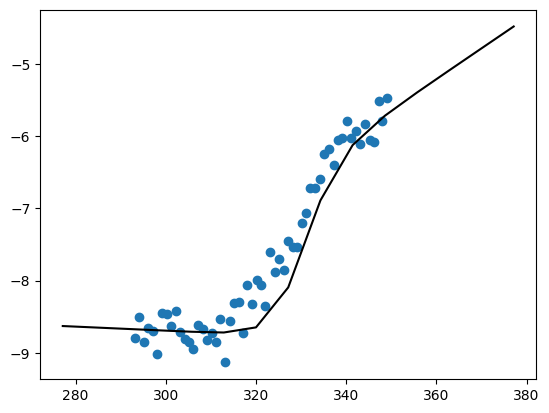

In [7]:
mintemp = 4 # degrees C
maxtemp = 104
mintemp += 273.15 # conversion to Kelvin
maxtemp += 273.15
eks = np.linspace(mintemp, maxtemp, 15)

sigma = tdmodel(eks, m1, b1, m2, b2, deltaH, TM)
plt.plot(eks,sigma, 'k-')
plt.scatter(x,y)
plt.show()

Yes, that is close enough.
## Do the fitting:
using the values just estimated as initial guesses:

In [8]:
p = [m1, b1, m2, b2, deltaH, TM]

# do it
# argument 'p0=p' supplies initial guesses for fittable parameters
popt, pcov = curve_fit(tdmodel, x, y, p0=p) 
popt

array([-1.04323190e-02, -5.61244180e+00, -2.78549004e-02,  4.27739956e+00,
        1.33638529e+05,  3.30900845e+02])

## Compute residuals and R$^2$:

In [9]:
residuals = y - tdmodel(x, *popt)
rsq = rsqrd(residuals, y)
print('Rsquared: %0.3f' % rsq)

Rsquared: 0.972


## Prepare a figure:

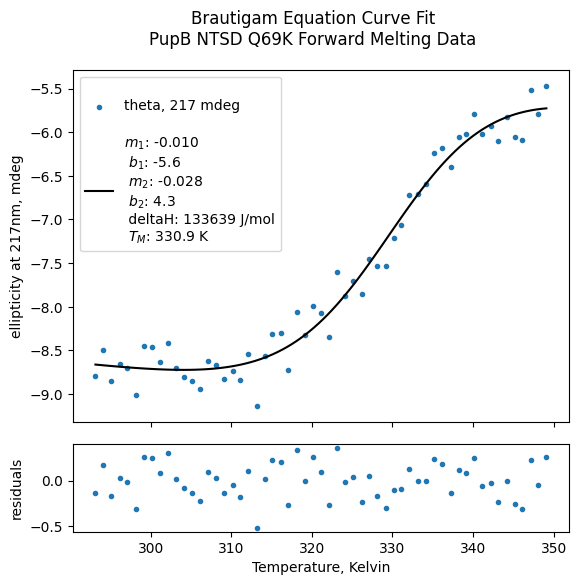

In [10]:
eks = np.linspace(np.min(x), np.max(x), 100)
why = tdmodel(eks, *popt)

# create a figure
fig = plt.figure()
fig.set_figwidth=(6)
fig.set_figheight(6)

# create grid for different subplots
spec = gridspec.GridSpec(ncols=1, nrows=2,
						hspace=0.1, height_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
ax0.scatter(x,y, marker='.', label='\ntheta, 217 mdeg\n')
ax0.plot(eks,why,'k-', label='$m_1$: %0.3f\n $b_1$: %0.1f\n $m_2$: %0.3f\n $b_2$: %0.1f\n deltaH: %0.0f J/mol\n $T_M$: %0.1f K' % tuple(popt))
ax0.legend()
ax0.set_ylabel('ellipticity at 217nm, mdeg')
plt.tick_params('x', labelbottom=False)

ax1 = fig.add_subplot(spec[1])
ax1.scatter(x, residuals, marker='.')
ax1.set_ylabel('residuals')
ax1.set_xlabel('Temperature, Kelvin')

plt.suptitle('Brautigam Equation Curve Fit\nPupB NTSD Q69K Forward Melting Data')
plt.show()

## Read and Scatter Plot:
the 'PupB NTSD L74A 25 uM 217 nm R.csv' data:

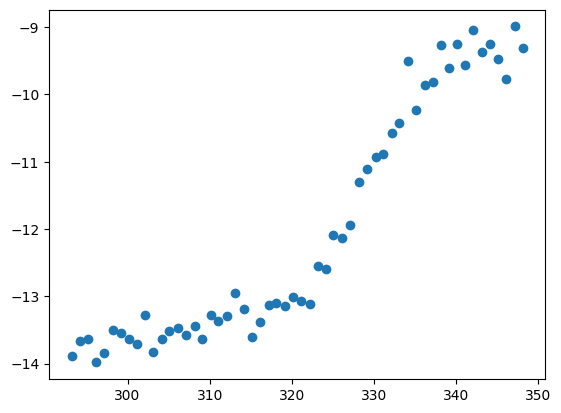

In [11]:
# read
fn = datadir+'/PupB NTSD L74A 25 uM 217 nm R.csv'
x,y = csv2xy(fn)

# scatter plot:
plt.scatter(x,y)
plt.show()

## Get the low- and high-temperature lines:

In [12]:
# get the first 20 points for a low temp line
eks = x[:20]
why = y[:20]

ltlineparam, pcov = curve_fit(sl, eks, why)
m1 = ltlineparam[0]
b1 = ltlineparam[1]

# get the last 15 points for a high temp line
eks = x[-15:]
why = y[-15:]

htlineparam, pcov = curve_fit(sl, eks, why)
m2 = htlineparam[0]
b2 = htlineparam[1]


## Estimates for $\Delta H$ and $T_M$:

In [13]:
deltaH = 250000
TM = 330
print('initial guesses for fitting:')
print('m1: %0.3f, b1: %0.3f, m2: %0.3f, b2: %0.3f, deltaH: %0.0f, TM: %0.0f' % (m1, b1, m2, b2, deltaH, TM)) 

initial guesses for fitting:
m1: 0.093, b1: -41.276, m2: 0.021, b2: -19.820, deltaH: 250000, TM: 330


## Compare Initial Paramters Against Data:

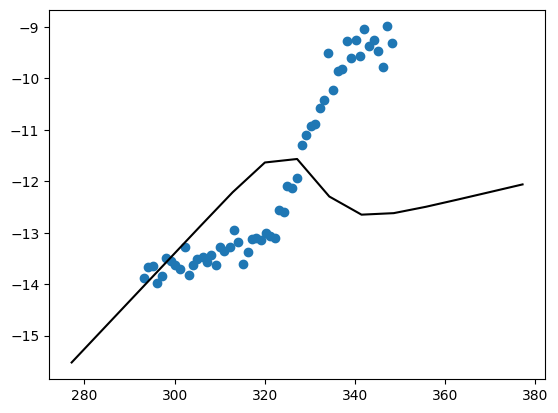

In [14]:
mintemp = 4 # degrees C
maxtemp = 104
mintemp += 273.15 # conversion to Kelvin
maxtemp += 273.15
eks = np.linspace(mintemp, maxtemp, 15)

sigma = tdmodel(eks, m1, b1, m2, b2, deltaH, TM)
plt.plot(eks,sigma, 'k-')
plt.scatter(x,y)
plt.show()

Which is pathological; the low- and high-temperature lines should be right on target, and note that exactly the same algorithm provided a really good starting point for the prior data set. Have a look at the raw data do get a sense of what's going on:

In [15]:
# print out the first 10 x, y pairs:
eks = x.flatten()
why = y.flatten()
for i in range(10):
    print('%0.0f, %0.1f' % (eks[i],why[i]))

348, -9.3
347, -9.0
346, -9.8
345, -9.5
344, -9.3
343, -9.4
342, -9.0
341, -9.6
340, -9.3
339, -9.6


The <i>first</i> data points in the set are high-temperature data, and temperatures are in descending order. The easiest fix is simply to reverse the order of each of the x and y arrays:

In [16]:
x=np.flip(x)
y=np.flip(y)

## and try again:

initial guesses for fitting:
m1: 0.024, b1: -20.699, m2: 0.041, b2: -23.411, deltaH: 250000, TM: 330


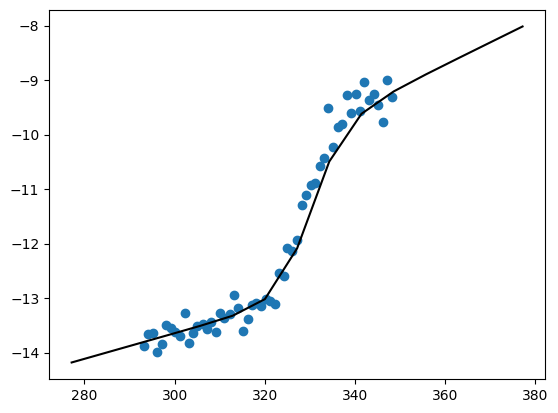

In [17]:
# get the first 20 points for a low temp line
eks = x[:20]
why = y[:20]

ltlineparam, pcov = curve_fit(sl, eks, why)
m1 = ltlineparam[0]
b1 = ltlineparam[1]

# get the last 15 points for a high temp line
eks = x[-15:]
why = y[-15:]

htlineparam, pcov = curve_fit(sl, eks, why)
m2 = htlineparam[0]
b2 = htlineparam[1]

deltaH = 250000
TM = 330
print('initial guesses for fitting:')
print('m1: %0.3f, b1: %0.3f, m2: %0.3f, b2: %0.3f, deltaH: %0.0f, TM: %0.0f' % (m1, b1, m2, b2, deltaH, TM)) 

mintemp = 4 # degrees C
maxtemp = 104
mintemp += 273.15 # conversion to Kelvin
maxtemp += 273.15
eks = np.linspace(mintemp, maxtemp, 15)

sigma = tdmodel(eks, m1, b1, m2, b2, deltaH, TM)
plt.plot(eks,sigma, 'k-')
plt.scatter(x,y)
plt.show()

That ought to do it:

In [18]:
p = [m1, b1, m2, b2, deltaH, TM]

# do it
# argument 'p0=p' supplies initial guesses for fittable parameters
popt, pcov = curve_fit(tdmodel, x, y, p0=p) 
popt

array([ 2.01743566e-02, -1.96929862e+01,  2.61726527e-03, -1.01857981e+01,
        2.67702875e+05,  3.29403734e+02])

In [19]:
residuals = y - tdmodel(x, *popt)
rsq = rsqrd(residuals, y)
print('Rsquared: %0.3f' % rsq)

Rsquared: 0.987


## Prepare a figure:

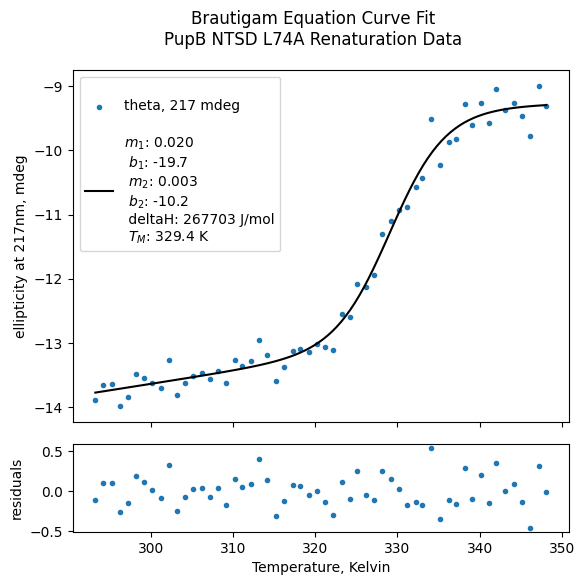

In [20]:
eks = np.linspace(np.min(x), np.max(x), 100)
why = tdmodel(eks, *popt)

# create a figure
fig = plt.figure()
fig.set_figwidth=(6)
fig.set_figheight(6)

# create grid for different subplots
spec = gridspec.GridSpec(ncols=1, nrows=2,
						hspace=0.1, height_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
ax0.scatter(x,y, marker='.', label='\ntheta, 217 mdeg\n')
ax0.plot(eks,why,'k-', label='$m_1$: %0.3f\n $b_1$: %0.1f\n $m_2$: %0.3f\n $b_2$: %0.1f\n deltaH: %0.0f J/mol\n $T_M$: %0.1f K' % tuple(popt))
ax0.legend()
ax0.set_ylabel('ellipticity at 217nm, mdeg')
plt.tick_params('x', labelbottom=False)

ax1 = fig.add_subplot(spec[1])
ax1.scatter(x, residuals, marker='.')
ax1.set_ylabel('residuals')
ax1.set_xlabel('Temperature, Kelvin')

plt.suptitle('Brautigam Equation Curve Fit\nPupB NTSD L74A Renaturation Data')
plt.show()